In [49]:
from google.colab import files

uploaded = files.upload()




Saving train-val.csv to train-val.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


path = "/content/train-val.csv"
df_train = pd.read_csv(path)
path = "/content/test.csv"
df_test = pd.read_csv(path)

#print the first rows of the dataframe to take a look of what it is about
df_train.head()

,id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,2009-03-04,Albury,13.8,22.1,0.2,NaN,NaN,WNW,57.0,...,57.0,26.0,1014.5,1013.1,NaN,NaN,15.6,21.9,0.0,0.0
1,2,2009-03-05,Albury,11.5,22.0,0.0,NaN,NaN,SW,50.0,...,60.0,33.0,1013.7,1011.8,NaN,NaN,13.9,21.4,0.0,0.0
2,3,2009-03-09,Albury,13.8,31.8,0.0,NaN,NaN,NNE,24.0,...,49.0,28.0,1019.7,1015.9,NaN,NaN,18.6,30.5,0.0,0.0
3,4,2009-03-10,Albury,15.5,32.0,0.0,NaN,NaN,NE,50.0,...,51.0,25.0,1019.5,1016.2,NaN,NaN,20.1,30.8,0.0,1.0
4,5,2009-03-11,Albury,18.4,30.5,1.2,NaN,NaN,NE,44.0,...,57.0,23.0,1021.3,1018.0,NaN,NaN,21.5,29.6,1.0,0.0


In [ ]:
# 2a. find number of samples and characteristics
num_samples = df_train.shape[0]
print("how many samples", num_samples)

num_char = df_train.shape[1]
print("number of characteristics", num_char)

# more simply
df_train.shape

number of samples 48423
number of characteristics 24


(48423, 24)

In [52]:
# 2b. find type of characteristics
df_train.dtypes

id                 int64
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
dtype: object

In [53]:
# 2.3 find the labels of given characteristics
char_labels = df_train.columns
print("Characteristics:")
print(char_labels)


Characteristics:
Index(['id', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [55]:
# 2d. find number of categories
num_dates = df_train['Date'].nunique()
print(f"Number of categories in Date: {num_dates}")

num_location = df_train['Location'].nunique()
print(f"Number of categories in Location: {num_location}")

num_WindGustDir = df_train['WindGustDir'].nunique()
print(f"Number of categories in WindGustDir: {num_WindGustDir}")

num_WindSpeed9am = df_train['WindSpeed9am'].nunique()
print(f"Number of categories in WindSpeed9am: {num_WindSpeed9am}")

num_WindSpeed3pm = df_train['WindSpeed3pm'].nunique()
print(f"Number of categories in WindSpeed3pm: {num_WindSpeed3pm}")

num_RainTomorrow = df_train['RainTomorrow'].nunique()
print(f"Number of categories in RainTomorrow: {num_RainTomorrow}")


Number of categories in Date: 2534
Number of categories in Location: 49
Number of categories in WindGustDir: 16
Number of categories in WindSpeed9am: 40
Number of categories in WindSpeed3pm: 42
Number of categories in RainTomorrow: 2


In [ ]:
# 2e. find number of samples for each category of Date
Location_samples = df_train['Location'].value_counts()

print("Number of samples for each category in Location:")
print(Location_samples)



Number of samples for each category in Location:
Sydney              1145
Canberra            1136
Darwin              1107
Perth               1104
MelbourneAirport    1099
Brisbane            1098
Hobart              1096
Adelaide            1064
Sale                1054
MountGambier        1053
Mildura             1048
CoffsHarbour        1046
PerthAirport        1044
Woomera             1044
Bendigo             1042
Cobar               1038
Wollongong          1034
Cairns              1032
SalmonGums          1031
Townsville          1027
Portland            1022
Penrith             1021
Dartmoor            1021
Watsonia            1021
SydneyAirport       1017
Ballarat            1014
WaggaWagga          1013
Launceston          1011
Newcastle           1007
Witchcliffe         1004
AliceSprings        1004
Nuriootpa           1004
Albany               999
Tuggeranong          993
NorahHead            991
GoldCoast            987
Albury               985
Richmond             983
N

In [ ]:
# 2z. find data correlation
# first we use describe to view some statistical data for the numerical data

df_train.describe()

,id,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,48423.000000,48263.000000,48322.000000,48423.000000,28039.000000,25426.000000,45330.000000,48066.000000,47566.000000,47865.000000,47164.000000,43643.000000,43634.000000,30533.000000,29442.000000,48197.000000,47510.000000,48423.000000,48423.000000
mean,24212.000000,10.661530,21.468416,2.218592,4.590831,7.162259,39.097948,13.670162,18.228167,70.574992,52.791621,1018.995010,1016.537425,4.407002,4.556076,15.411939,20.025576,0.231811,0.228383
std,13978.660379,6.058113,6.557396,7.377476,3.473241,3.607741,14.004819,8.957912,8.911087,18.817514,20.262837,7.030803,6.958443,2.892678,2.718374,6.119331,6.414521,0.421994,0.419795
min,1.000000,-8.200000,-3.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,982.000000,980.200000,0.000000,0.000000,-7.000000,-4.200000,0.000000,0.000000
25%,12106.500000,6.500000,16.700000,0.000000,2.200000,4.400000,30.000000,7.000000,11.000000,59.000000,39.000000,1014.500000,1011.900000,1.000000,2.000000,11.100000,15.400000,0.000000,0.000000
50%,24212.000000,10.300000,20.700000,0.000000,4.000000,8.000000,37.000000,13.000000,17.000000,72.000000,53.000000,1019.100000,1016.600000,5.000000,5.000000,14.900000,19.300000,0.000000,0.000000
75%,36317.500000,14.700000,25.800000,0.800000,6.200000,10.200000,46.000000,19.000000,24.000000,85.000000,66.000000,1023.700000,1021.200000,7.000000,7.000000,19.500000,24.200000,0.000000,0.000000
max,48423.000000,29.600000,45.400000,371.000000,68.800000,14.200000,126.000000,87.000000,83.000000,100.000000,100.000000,1040.900000,1039.600000,9.000000,8.000000,37.300000,43.300000,1.000000,1.000000


<ipython-input-59-7bbb3a00c308>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()


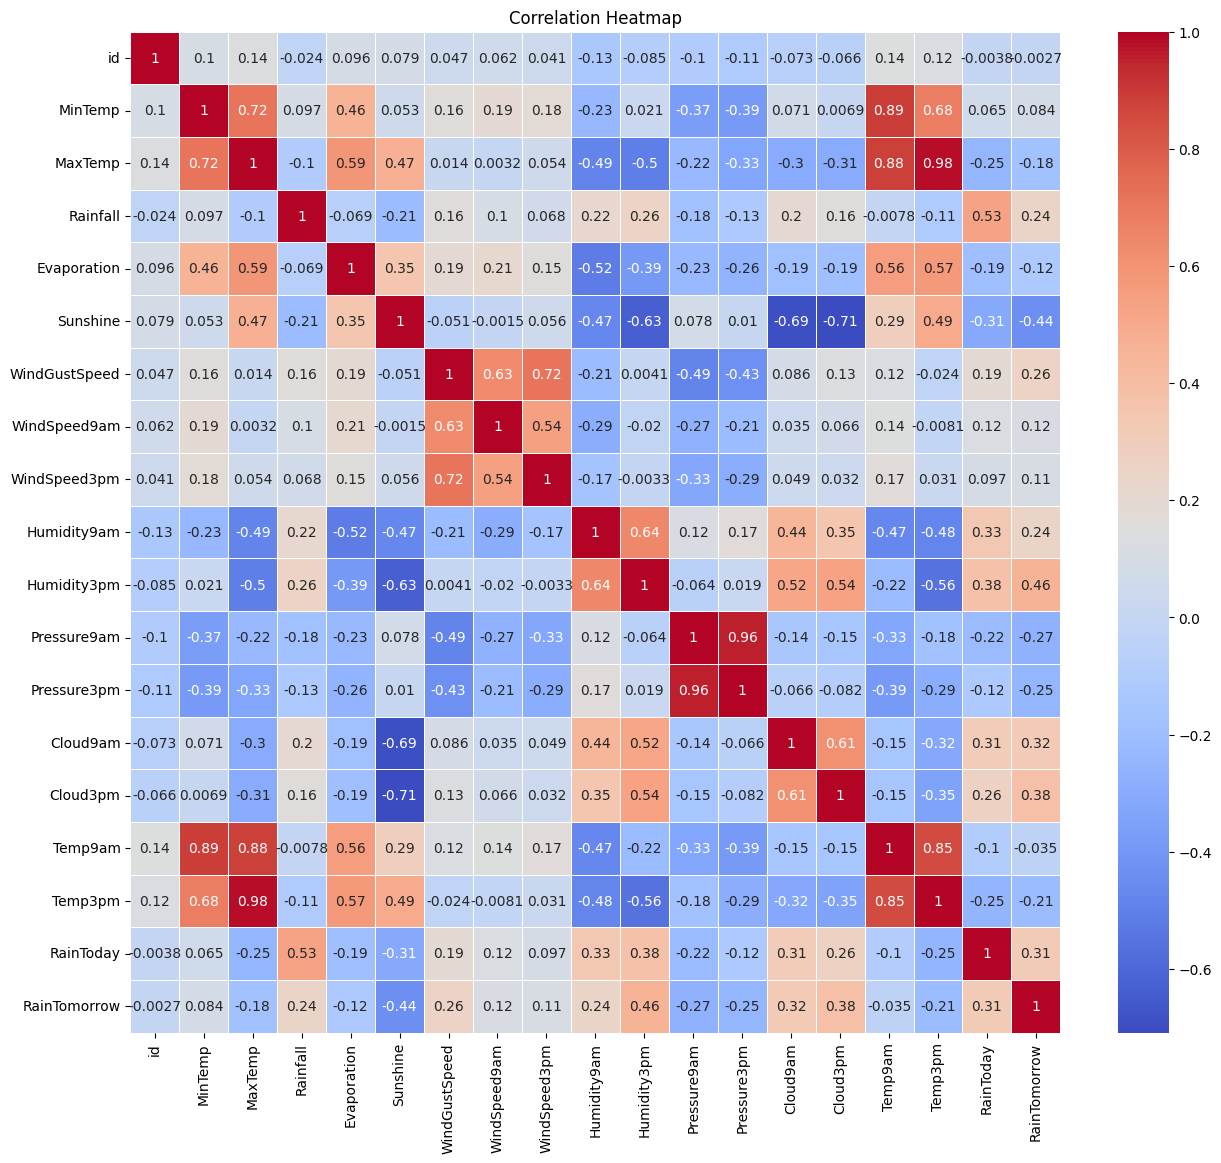

In [ ]:
# Correlation heatmap for better visualization of the linear dependencies of numerical data
correlation_matrix = df_train.corr()
plt.figure(figsize=(15, 13)) 
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-61-b471125cad26>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()


MaxTemp - MinTemp
WindSpeed3pm - WindGustSpeed
Pressure3pm - Pressure9am
Cloud3pm - Sunshine
Temp9am - MinTemp
Temp9am - MaxTemp
Temp3pm - MaxTemp
Temp3pm - Temp9am


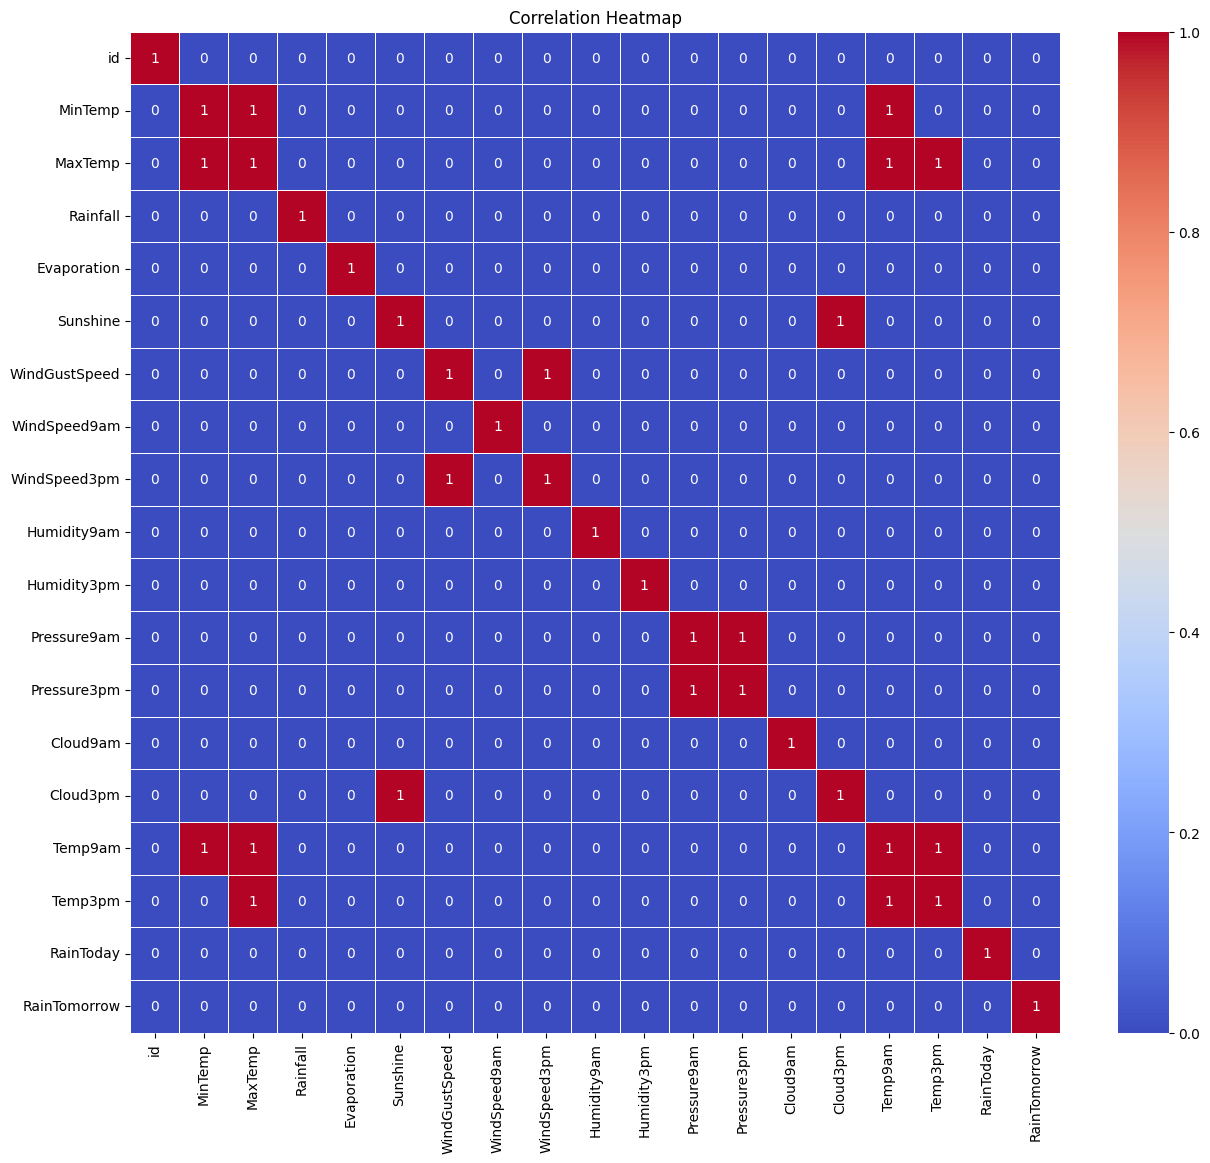

In [ ]:
# find characteristics with strong correlation, > abs(0.7)

correlation_matrix = df_train.corr()


threshold = 0.7

# Find and print high correlation sets
high_corr_matrix = abs(correlation_matrix) > threshold

for i in range(len(high_corr_matrix.columns)):
    for j in range(i):
        if high_corr_matrix.iloc[i, j]:
            print(f"{high_corr_matrix.columns[i]} - {high_corr_matrix.columns[j]}")

plt.figure(figsize=(15, 13))
sns.heatmap(high_corr_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>],
       [<Axes: title={'center': 'RainToday'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

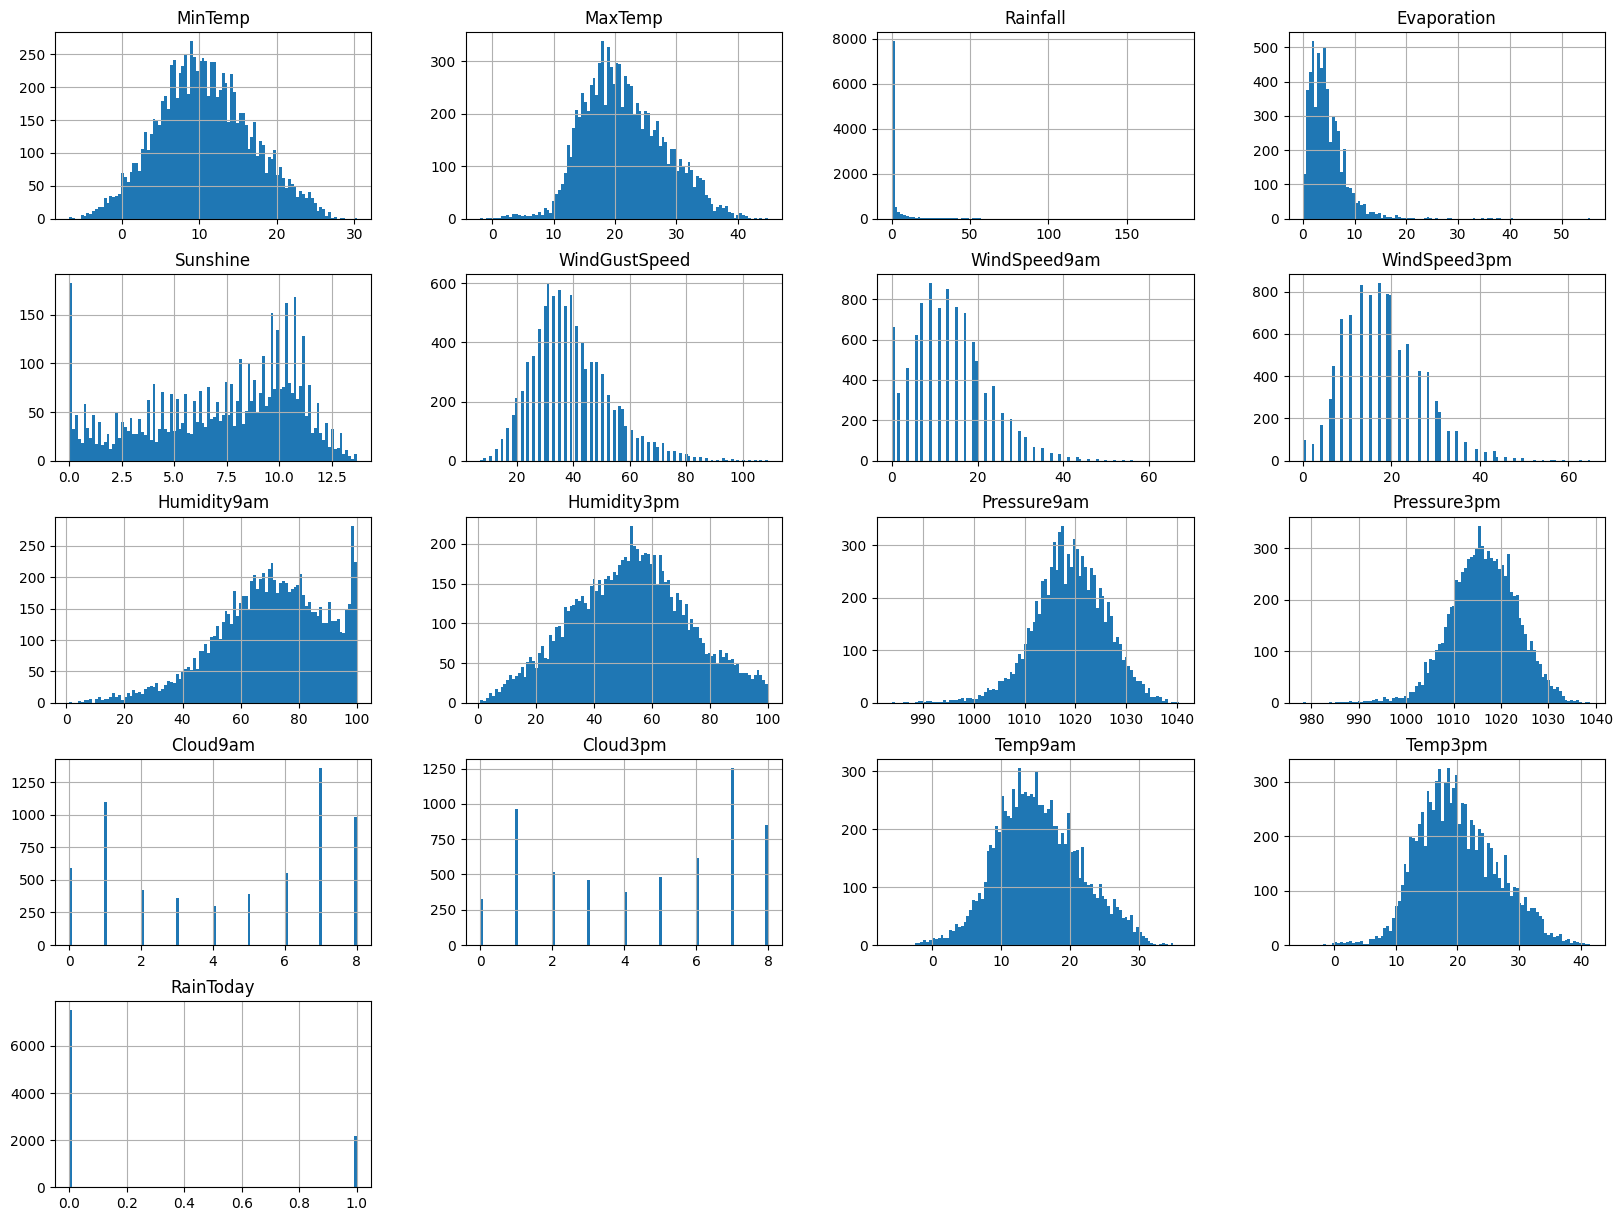

In [ ]:
# 2g. visualize distribution of dataset's characteristics.
df_test.hist(bins = 100, figsize = (20,15))

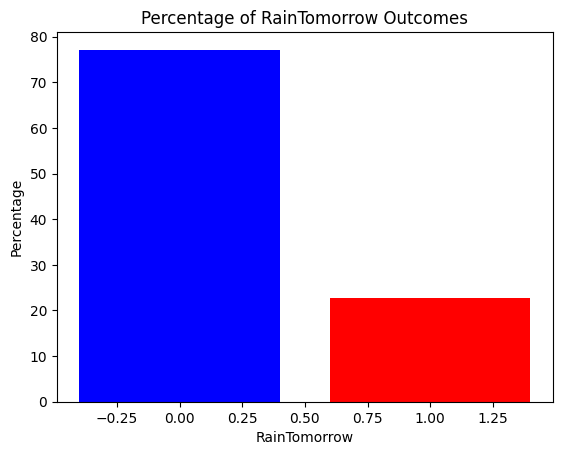

In [69]:
# percentage of RainTommorow outcomes in the dataset, better understanding of the above histogram
# The reader should defy the spectrums from [-0.25,0.25] , [0.75, 1.25]. They are given for better visulatization
# They do not imply Continuity

rain_tomorrow_percentage = df_train['RainTomorrow'].value_counts(normalize=True) * 100

# bar chart
plt.bar(rain_tomorrow_percentage.index, rain_tomorrow_percentage.values, color=['blue', 'red'])
plt.xlabel('RainTomorrow')
plt.ylabel('Percentage')
plt.title('Percentage of RainTomorrow Outcomes')
plt.show()

In [70]:
# number of missing values in each category
df_train.isnull().sum()

id                   0
Date                 0
Location             0
MinTemp            160
MaxTemp            101
Rainfall             0
Evaporation      20384
Sunshine         22997
WindGustDir       3121
WindGustSpeed     3093
WindDir9am        3821
WindDir3pm        1328
WindSpeed9am       357
WindSpeed3pm       857
Humidity9am        558
Humidity3pm       1259
Pressure9am       4780
Pressure3pm       4789
Cloud9am         17890
Cloud3pm         18981
Temp9am            226
Temp3pm            913
RainToday            0
RainTomorrow         0
dtype: int64

In [ ]:

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2
from scipy.sparse import issparse
from sklearn.preprocessing import FunctionTransformer

In [73]:
columns_to_remove = ['id', 'WindSpeed9am', 'WindSpeed3pm', 'Temp9am', 'Temp3pm', 'Cloud9am', 'Cloud3pm','Humidity9am','Pressure3pm', 'WindDir3pm','WindDir9am']

df_train = df_train.drop(columns=columns_to_remove)



In [74]:
# percentage of null values
df_train.isnull().sum()
(df_train.isna().sum()/len(df_train))*100


Date              0.000000
Location          0.000000
MinTemp           0.330421
MaxTemp           0.208579
Rainfall          0.000000
Evaporation      42.095698
Sunshine         47.491894
WindGustDir       6.445284
WindGustSpeed     6.387461
Humidity3pm       2.600004
Pressure9am       9.871342
RainToday         0.000000
RainTomorrow      0.000000
dtype: float64

In [75]:
columns_to_remove = ['Evaporation']

df_train = df_train.drop(columns=columns_to_remove)

In [ ]:
# in this cell we basically concetrate together the empty values for each category per location.
# This will help us undestrand if some characteristics are totally or partialy measing in a Location

from tabulate import tabulate

columns_to_check = ['MinTemp', 'MaxTemp', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am']

# Group by 'Location' and count missing values for each column
missing_values_by_city = df_train.groupby('Location')[columns_to_check].apply(lambda x: x.isna().sum()).reset_index()

# Total samples
missing_values_by_city['Total Samples'] = df_train.groupby('Location').size().reset_index(name='Total Samples')['Total Samples']

table = tabulate(missing_values_by_city, headers='keys', tablefmt='pretty', showindex=False)
print(table)




+------------------+---------+---------+----------+-------------+---------------+-------------+-------------+---------------+
|     Location     | MinTemp | MaxTemp | Sunshine | WindGustDir | WindGustSpeed | Humidity3pm | Pressure9am | Total Samples |
+------------------+---------+---------+----------+-------------+---------------+-------------+-------------+---------------+
|     Adelaide     |    1    |    0    |   499    |      8      |       8       |      2      |      4      |     1064      |
|      Albany      |   12    |    9    |   164    |     999     |      999      |     220     |      4      |      999      |
|      Albury      |    1    |    0    |   985    |      4      |       4       |      3      |      0      |      985      |
|   AliceSprings   |    1    |    0    |   175    |     16      |      16       |      1      |      1      |     1004      |
|  BadgerysCreek   |    1    |    0    |   981    |      6      |       6       |      9      |     69      |      981

In [ ]:
#Sunshine
total_mean_sunshine = df_train['Sunshine'].mean()

# Print the updated DataFrame
print(df_train)
df_train.isnull().sum()

             Date Location  MinTemp  MaxTemp  Rainfall  Sunshine WindGustDir  \
0      2009-03-04   Albury     13.8     22.1       0.2       NaN         WNW   
1      2009-03-05   Albury     11.5     22.0       0.0       NaN          SW   
2      2009-03-09   Albury     13.8     31.8       0.0       NaN         NNE   
3      2009-03-10   Albury     15.5     32.0       0.0       NaN          NE   
4      2009-03-11   Albury     18.4     30.5       1.2       NaN          NE   
...           ...      ...      ...      ...       ...       ...         ...   
48418  2017-06-12    Uluru      5.1     19.7       0.0       NaN           E   
48419  2017-06-16    Uluru      5.2     24.3       0.0       NaN           E   
48420  2017-06-20    Uluru      3.5     21.8       0.0       NaN           E   
48421  2017-06-23    Uluru      5.4     26.9       0.0       NaN           N   
48422  2017-06-24    Uluru      7.8     27.0       0.0       NaN          SE   

       WindGustSpeed  Humidity3pm  Pres

Date                 0
Location             0
MinTemp            160
MaxTemp            101
Rainfall             0
Sunshine         22997
WindGustDir       3121
WindGustSpeed     3093
Humidity3pm       1259
Pressure9am       4780
RainToday            0
RainTomorrow         0
dtype: int64

In [77]:
# Defining numeric transformer
numeric_features = df_train.select_dtypes(include=['float64']).columns
# Exclude the "RainTomorrow", "Sunshine" and "Evaporation" column
numeric_features = numeric_features[(numeric_features != 'RainTomorrow')] #& (numeric_features != 'Sunshine')]  #& (numeric_features != 'Evaporation')]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),    # empty values get the mean
    ('scaler', StandardScaler())])  #normalize values

In [78]:
# Date is only useful regarding the month.
df_train["Date"] = df_train["Date"].apply(lambda x: float(x[5:7]))

In [ ]:
#Splitting categorical features and defininf categorical transformer
from sklearn.base import BaseEstimator, TransformerMixin
categorical_features = df_train.select_dtypes(include=['object']).columns
categorical_features = categorical_features[categorical_features != 'Date']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])                    
categorical_features

Index(['Location', 'WindGustDir'], dtype='object')

In [ ]:
# Create a preprocessor for processing the dataframe
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])




In [82]:
X_processed = preprocessor.fit_transform(df_train)
y = df_train['RainTomorrow']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.3, random_state=42)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Initialize classifiers:
NB_classifier = GaussianNB()
KN_classifier = KNeighborsClassifier()
LR_classifier = LogisticRegression()
SVC_classifier = SVC()
RF_classifier = RandomForestClassifier()
DT_classifier = DecisionTreeClassifier()
MLP_classifier = MLPClassifier()


In [ ]:
# Train the classifiers:
KN_classifier.fit(X_train,y_train)
LR_classifier.fit(X_train,y_train)
SVC_classifier.fit(X_train,y_train)
RF_classifier.fit(X_train,y_train)
DT_classifier.fit(X_train,y_train)
MLP_classifier.fit(X_train,y_train)

# about 4 minutes


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [ ]:
dense_X_train = X_train.toarray() # only for NB - avoid sparse matrix problem
NB_classifier.fit(dense_X_train,y_train)

GaussianNB()

In [ ]:
# Make predictions
KN_y_pred = KN_classifier.predict(X_val)
LR_y_pred = LR_classifier.predict(X_val)
SVC_y_pred = SVC_classifier.predict(X_val)
RF_y_pred = RF_classifier.predict(X_val)
DT_y_pred = DT_classifier.predict(X_val)
MLP_y_pred = MLP_classifier.predict(X_val)

# about 1 minute

In [88]:
X_val_dense = X_val.toarray()
NB_y_pred = NB_classifier.predict(X_val_dense)

In [ ]:
from sklearn.metrics import f1_score

# F1 SCORE

print("K-Nearest Neighbors: ",f1_score(y_val, KN_y_pred))
print("Logistic Regression: ", f1_score(y_val, LR_y_pred))
print("Support Vector Classifier: ",f1_score(y_val, SVC_y_pred))
print("Random Forest: ", f1_score(y_val, RF_y_pred))
print("Decision Tree: ", f1_score(y_val, DT_y_pred))
print("MLPClassifier: ", f1_score(y_val, MLP_y_pred))
print("NBClassifier", f1_score(y_val, NB_y_pred))

K-Nearest Neighbors:  0.5944358043891481
Logistic Regression:  0.6146853146853147
Support Vector Classifier:  0.6219401631912965
Random Forest:  0.6180580437119313
Decision Tree:  0.5409518126212144
MLPClassifier:  0.6439725171767645
NBClassifier 0.46316186169210477


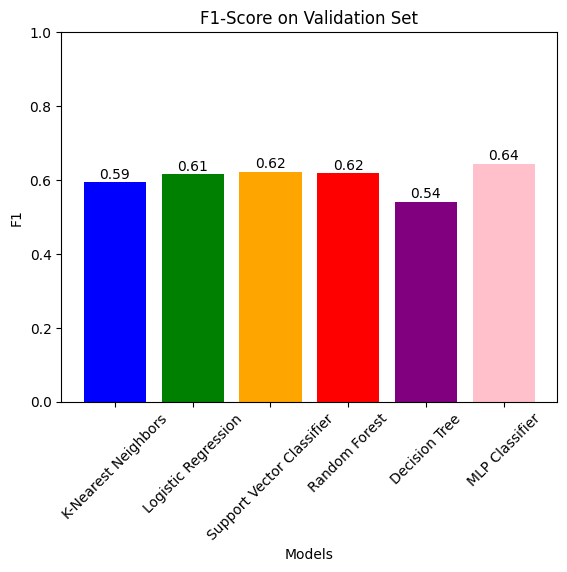

In [ ]:
# Calculate accuracies
KN_accuracy = f1_score(y_val, KN_y_pred)
LR_accuracy = f1_score(y_val, LR_y_pred)
SVC_accuracy = f1_score(y_val, SVC_y_pred)
RF_accuracy = f1_score(y_val, RF_y_pred)
DT_accuracy = f1_score(y_val, DT_y_pred)
MLP_accuracy = f1_score(y_val, MLP_y_pred)

# Create a bar graph
models = ['K-Nearest Neighbors', 'Logistic Regression', 'Support Vector Classifier', 'Random Forest', 'Decision Tree','MLP Classifier']
accuracies = [KN_accuracy, LR_accuracy, SVC_accuracy, RF_accuracy, DT_accuracy, MLP_accuracy]

plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red', 'purple','pink'])
plt.title('F1-Score on Validation Set')
plt.xlabel('Models')
plt.ylabel('F1')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for accuracy
plt.xticks(rotation=45)

for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center')

plt.show()


In [ ]:
# Preparing test

df_test["Date"] = df_test["Date"].apply(lambda x: float(x[3:4]))
columns_to_remove_numerical = ['WindSpeed9am', 'WindSpeed3pm', 'Temp9am', 'Temp3pm', 'Cloud9am', 'Cloud3pm','Humidity9am','Pressure3pm']


df_test = df_test.drop(columns=columns_to_remove_numerical)

columns_to_remove_categorical = ['WindDir3pm','WindDir9am']

df_test = df_test.drop(columns=columns_to_remove_categorical)

In [ ]:
# Best training performance MLP - thus we use it for testing
df_test_processed = preprocessor.fit_transform(df_test)
predictions = MLP_classifier.predict(df_test_processed)

In [ ]:
df_results= pd.DataFrame(predictions, columns=['RainTomorrow'])
df_results.insert(0, 'id', range(1, len(df_results) + 1))
print(df_results.head(5))
print(df_results.shape)

# Save DataFrame to CSV file
df_results.to_csv('df_results.csv', header=True, index=False)

# Download the CSV file
files.download('df_results.csv')

   id  RainTomorrow
0   1           0.0
1   2           0.0
2   3           0.0
3   4           1.0
4   5           0.0
(9699, 2)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict

classifiers = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'MLP with one hidden layer': MLPClassifier(),
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}
#Define the parameter grid for each classifier
param_grid = {
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7, 10]},
    'LogisticRegression': {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
    'MLP with one hidden layer': {'hidden_layer_sizes': [(10,), (25,), (50,)], 'max_iter': [50, 85, 100, 200, 300]},
    'SVC': {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']},
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
}

#Perform GridSearchCV for each classifier
best_models = {}

for name, classifier in classifiers.items():
    params = param_grid.get(name, {})
    grid_search = GridSearchCV(classifier, params, cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)  
    best_models[name] = grid_search.best_estimator_
    print(f"Best hyperparameters for {name}: {grid_search.best_params_}")

Best hyperparameters for KNeighborsClassifier: {'n_neighbors': 7}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best hyperparameters for LogisticRegression: {'C': 100, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Best hyperparameters for MLP with one hidden layer: {'hidden_layer_sizes': (10,), 'max_iter': 100}
Best hyperparameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best hyperparameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}
Best hyperparameters for Random Forest: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 150}


6.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [ ]:
# Initialize classifiers with best parameters
from sklearn.svm import SVC
NB_classifier_best = GaussianNB()
KN_classifier_best = KNeighborsClassifier(n_neighbors=7)
LR_classifier_best = LogisticRegression(C=100, penalty = 'l2')
SVC_classifier_best = SVC(C= 10, gamma= 'scale', kernel= 'rbf')
RF_classifier_best = RandomForestClassifier(max_depth= 30, min_samples_split= 5, n_estimators= 150)
DT_classifier_best = DecisionTreeClassifier(max_depth= 10, min_samples_split= 2)
MLP_classifier_best = MLPClassifier(hidden_layer_sizes=(10,),max_iter=100)


KN_classifier_best.fit(X_train,y_train)
LR_classifier_best.fit(X_train,y_train)
SVC_classifier_best.fit(X_train,y_train)
RF_classifier_best.fit(X_train,y_train)
DT_classifier_best.fit(X_train,y_train)
MLP_classifier_best.fit(X_train,y_train)


KN_y_pred_best = KN_classifier_best.predict(X_val)
LR_y_pred_best = LR_classifier_best.predict(X_val)
SVC_y_pred_best = SVC_classifier_best.predict(X_val)
RF_y_pred_best = RF_classifier_best.predict(X_val)
DT_y_pred_best = DT_classifier_best.predict(X_val)
MLP_y_pred_best = MLP_classifier_best.predict(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# F1 score
print("K-Nearest Neighbors: ",f1_score(y_val, KN_y_pred_best))
print("Logistic Regression: ", f1_score(y_val, LR_y_pred_best))
print("Support Vector Classifier: ",f1_score(y_val, SVC_y_pred_best))
print("Random Forest: ", f1_score(y_val, RF_y_pred_best))
print("Decision Tree: ", f1_score(y_val, DT_y_pred_best))
print("MLPClassifier: ", f1_score(y_val, MLP_y_pred_best))

K-Nearest Neighbors:  0.5972515856236787
Logistic Regression:  0.6145778710015731
Support Vector Classifier:  0.6325112886418897
Random Forest:  0.6228805996787437
Decision Tree:  0.5676625659050967
MLPClassifier:  0.6496276235612729


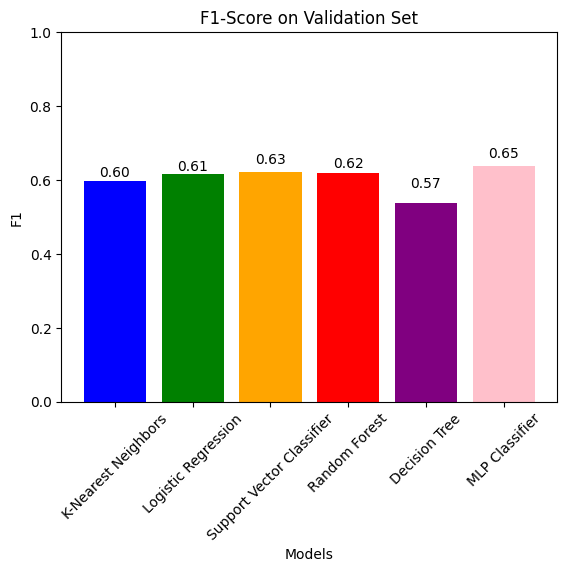

In [ ]:
KN_accuracy_best = f1_score(y_val, KN_y_pred_best)
LR_accuracy_best = f1_score(y_val, LR_y_pred_best)
SVC_accuracy_best = f1_score(y_val, SVC_y_pred_best)
RF_accuracy_best = f1_score(y_val, RF_y_pred_best)
DT_accuracy_best = f1_score(y_val, DT_y_pred_best)
MLP_accuracy_best = f1_score(y_val, MLP_y_pred_best)
# Create a bar graph
models = ['K-Nearest Neighbors', 'Logistic Regression', 'Support Vector Classifier', 'Random Forest', 'Decision Tree','MLP Classifier']
accuracies_best = [KN_accuracy_best, LR_accuracy_best, SVC_accuracy_best, RF_accuracy_best, DT_accuracy_best, MLP_accuracy_best]

plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red', 'purple','pink'])
plt.title('F1-Score on Validation Set')
plt.xlabel('Models')
plt.ylabel('F1')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for accuracy_best
plt.xticks(rotation=45)

for i, accuracy_best in enumerate(accuracies_best):
    plt.text(i, accuracy_best + 0.01, f'{accuracy_best:.2f}', ha='center')

plt.show()



In [45]:
predictions_best = MLP_classifier_best.predict(df_test_processed)

In [ ]:
from google.colab import files
result_df_best=pd.DataFrame(predictions_best, columns=['RainTomorrow'])
result_df_best.insert(0, 'id', range(1, len(result_df_best) + 1))
print(result_df_best.head(5))
print(result_df_best.shape)

result_df_best.to_csv('result_df_best.csv', header=True, index=False)
files.download('result_df_best.csv')


   id  RainTomorrow
0   1           0.0
1   2           0.0
2   3           0.0
3   4           1.0
4   5           0.0
(9699, 2)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>